# Import the necessary libraries

In [1]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np

# Load the data and print them


In [2]:
df = pd.read_csv(r"C:\Users\mikek\projects\Text-Normalization\src\data\normalization_assesment_dataset_10k.csv")
print(df)

                                  raw_comp_writers_text  \
0               Jordan Riley/Adam Argyle/Martin Brammer   
1                                         Martin Hygård   
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...   
3                                        Mendel Brikman   
4                                             Alvin Lee   
...                                                 ...   
9995                                      Terrance Byrd   
9996                                       Pillar Point   
9997  FRANK BRIAN KEITH (MR)/JENNINGS JOHN JOSEPH IV...   
9998                                       Sierra Lucas   
9999                         Budde Music/Lorenz Brunner   

                                             CLEAN_TEXT  
0               Jordan Riley/Adam Argyle/Martin Brammer  
1                                         Martin Hygård  
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...  
3                                                   NaN  
4

## Check the CLEAN_TEXT values are identical to raw_comp_writers_text

In [3]:

print("CLEAN_TEXT values identical to raw_comp_writers_text:",df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']].shape[0])
print("percentage of CLEAN_TEXT values identical to raw_comp_writers_text:",(df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']].shape[0]/df.shape[0]) * 100,"%")

print(df[df['raw_comp_writers_text'] == df['CLEAN_TEXT']])

CLEAN_TEXT values identical to raw_comp_writers_text: 6323
percentage of CLEAN_TEXT values identical to raw_comp_writers_text: 63.23 %
                                  raw_comp_writers_text  \
0               Jordan Riley/Adam Argyle/Martin Brammer   
1                                         Martin Hygård   
2     Jesse Robinson/Greg Phillips/Kishaun Bailey/Ka...   
4                                             Alvin Lee   
6                                          Mefi Morales   
...                                                 ...   
9992  Ludovic Berrou/Jean-Christophe Colliou/Damien ...   
9993  Jonny Buckland/Guy Berryman/Will Champion/Chri...   
9995                                      Terrance Byrd   
9996                                       Pillar Point   
9998                                       Sierra Lucas   

                                             CLEAN_TEXT  
0               Jordan Riley/Adam Argyle/Martin Brammer  
1                                       

## Check which rows have NaN values.

In [4]:
print("Empty CLEAN_TEXT values:",df[df['CLEAN_TEXT'].isnull()].shape[0])
print("percentage of Empty CLEAN_TEXT values:",(df[df['CLEAN_TEXT'].isnull()].shape[0]/df.shape[0]) * 100,"%")

print(df[df['CLEAN_TEXT'].isnull()])


Empty CLEAN_TEXT values: 1341
percentage of Empty CLEAN_TEXT values: 13.41 %
                                  raw_comp_writers_text CLEAN_TEXT
3                                        Mendel Brikman        NaN
8                               UNKNOWN WRITER (999990)        NaN
25                                               fo man        NaN
27                                          Traditional        NaN
28                                            #unknown#        NaN
...                                                 ...        ...
9968                                   Phanendra/Shakti        NaN
9974  AEPI/Hamburge, Darjean/Hamburge, Darjean, Sevi...        NaN
9976  Orhan Gencebay, Yaacov Lamai, Dolev Ram, Penn ...        NaN
9979                             Galkin A./Afanas'ev V.        NaN
9981                                              VCPMC        NaN

[1341 rows x 2 columns]


In [5]:
print("Empty raw_comp_writers_text values:",df[df['raw_comp_writers_text'].isnull()].shape[0])
print("percentage of Empty raw_comp_writers_text values:",(df[df['raw_comp_writers_text'].isnull()].shape[0]/df.shape[0]) * 100,"%")

print(df[df['raw_comp_writers_text'].isnull()])

Empty raw_comp_writers_text values: 1
percentage of Empty raw_comp_writers_text values: 0.01 %
    raw_comp_writers_text CLEAN_TEXT
165                   NaN        NaN


We can see that some entries have NaN values in the CLEAN_TEXT column. Some of them are logical since they doesnt contain any writer information (e.g., UNKNOWN WRITER (999990) -> NaN). However, there are some other entries that have NaN values in the CLEAN_TEXT column but they have writer information in the raw_comp_writers_text column (e.g., Phanendra/Shakti -> NaN). Those are outliers.

# Check most common words in the raw_comp_writers_text column

[('<Unknown>', 341), ('Copyright Control', 119), ('Traditional', 21), ('Wolfgang Amadeus Mozart', 20), ('COPYRIGHT CONTROL', 20), ('Sameer', 16), ('Giuseppe Verdi', 14), ('Johann Sebastian Bach', 11), ('[traditional]', 10), ('Ludwig van Beethoven', 9), ('Billie Ray Fingers', 9), ('Bruce Fingers', 9), ('Thomas Bergersen', 9), ('ZUN', 9), ('John Lennon', 8), ('Paul McCartney', 8), ('Juice WRLD', 8), ('Anand Bakshi', 8), ('LEEZ', 8), ('Ollounder', 8), ('George Gershwin', 8), ('Savan Kotecha', 7), ('WRITER UNKNOWN', 7), ('Robert Hunter', 7), ('Not Documented', 7), ('Richard Strauss', 7), ('A. R. Rahman', 7), ('김홍중', 7), ('EDEN', 7), ('송민기', 7), ('Max Martin', 7), ('Nadeem-Shravan', 6), ('Jesús María Corman', 6), ('Mikel Erentxun', 6), ('Andrew Lloyd Webber', 6), ('Antonio Vivaldi', 6), ('Phạm Duy', 6), ('Ritchie Blackmore', 6), ('Phil Collins', 6), ('Lorenzo Da Ponte', 6), ('Franz Schubert', 6), ('Lars Ulrich', 6), ('James Hetfield', 6), ('Sony', 6), ('Sonoton Music GmbH & Co. KG', 6), ('T

C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mikek\AppData\Local\Temp\ipykernel_27960\2195440056.py:28: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing f

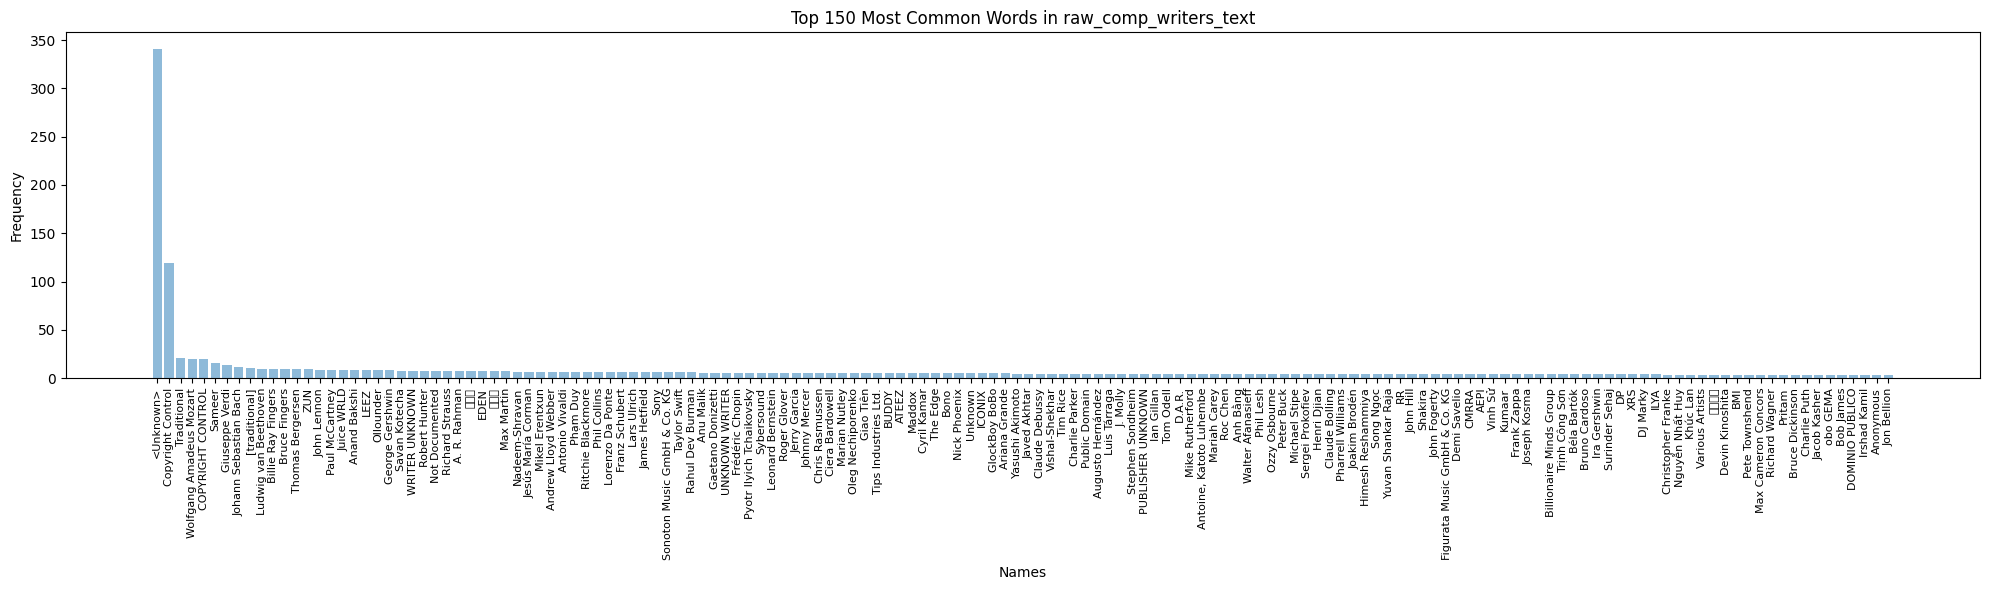

In [6]:

names_raw = []
for text in df['raw_comp_writers_text']:
    if isinstance(text, float):
        continue
    names_raw += re.split(r'/', text)

# Count the frequency of each name
name_freq_raw = Counter(names_raw)
print(name_freq_raw.most_common(150))

# Create a histogram of the most common names
names = [name for name, freq in name_freq_raw.most_common(150)]
freq = [freq for name, freq in name_freq_raw.most_common(150)]
y_pos = np.arange(len(names))

plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(y_pos, freq, align='center', alpha=0.5)

# Customize x-axis labels
plt.xticks(y_pos, names, rotation=90, fontsize=8)

plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Top 150 Most Common Words in raw_comp_writers_text')

plt.tight_layout() 
plt.show()


We can observe that there are frequent words that are not related to the writer information. We can remove those words from the raw_comp_writers_text column to simplify the text by using rule-based methods.

# Isolating the names from the CLEAN_TEXT column

[('Wolfgang Amadeus Mozart', 20), ('Sameer', 14), ('MICHAEL', 14), ('Giuseppe Verdi', 13), ('JAMES', 13), ('Johann Sebastian Bach', 11), ('Juice WRLD', 11), ('JOHN', 10), ('The Alchemist', 9), ('Billie Ray Fingers', 9), ('Bruce Fingers', 9), ('THOMAS', 9), ('Thomas Bergersen', 9), ('DANIEL', 9), ('Anand Bakshi', 9), ('Ludwig van Beethoven', 8), ('Tee Grizzley', 8), ('John Lennon', 8), ('Paul McCartney', 8), ('ROBERT', 8), ('Thomas', 8), ('DAVID', 8), ('George Gershwin', 8), ('Skilla Baby', 7), ('Future', 7), ('WILLIAM', 7), ('Daniel', 7), ('Robert Hunter', 7), ('FEAT.', 7), ('BENJAMIN', 7), ('Richard Strauss', 7), ('PAUL', 7), ('SoFaygo', 7), ('John', 7), ('A. R. Rahman', 7), ('David', 7), ('Brown', 7), ('Jackson', 7), ('King Von', 6), ('BabyTron', 6), ('Antonio', 6), ('Ritchie Blackmore', 6), ('Phil Collins', 6), ('Traditional', 6), ('Sdot Go', 6), ('BUUREN', 6), ('BRIAN', 6), ('MATTHEW', 6), ('Lorenzo Da Ponte', 6), ('Anthony', 6), ('Franz Schubert', 6), ('Smith', 6), ('Lars Ulrich',

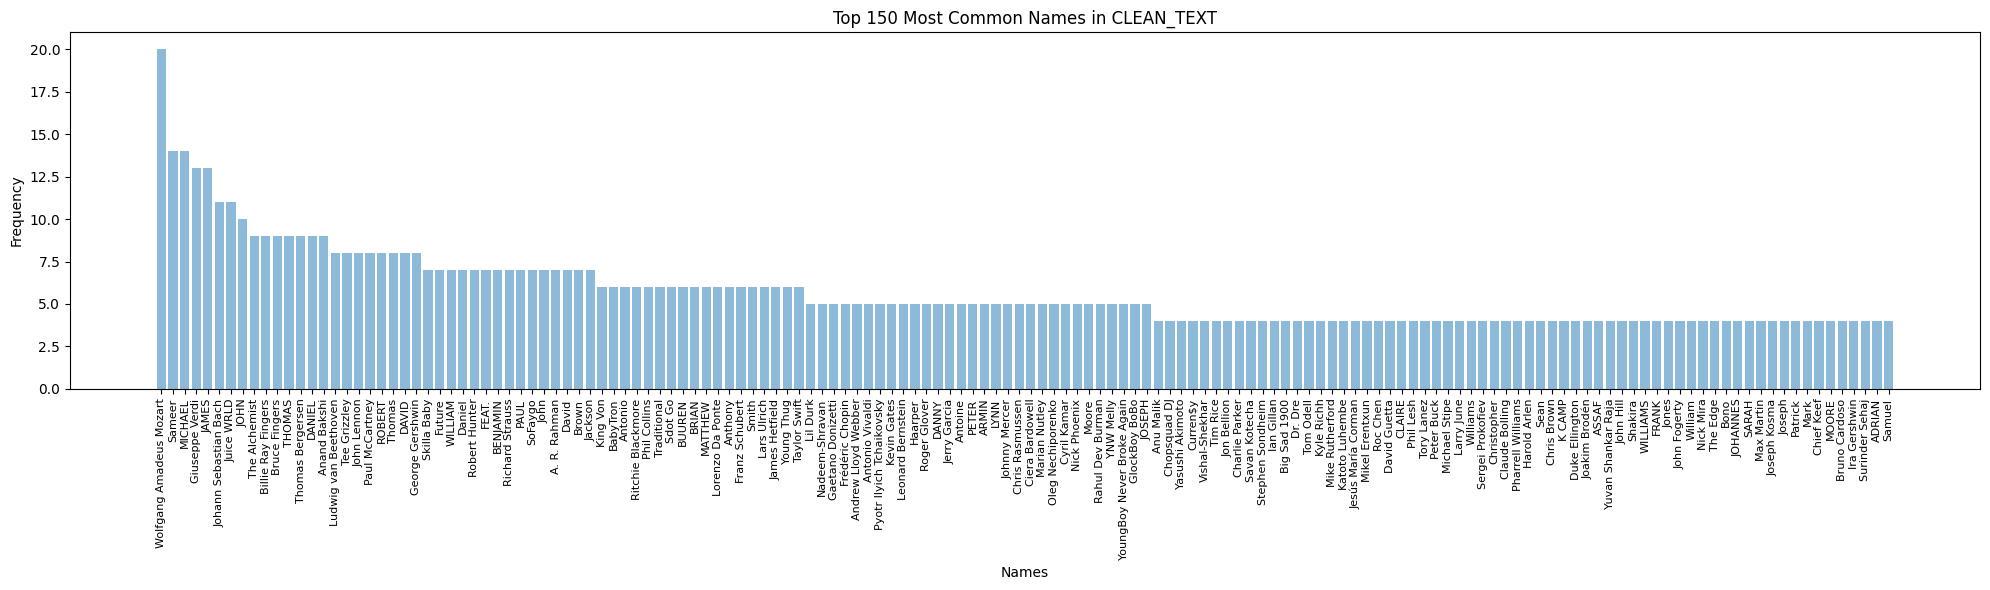

In [7]:
#Keeping only the words that have more than 3 letters assuming they are names
names_clean = [
    name 
    for text in df['CLEAN_TEXT']
    if isinstance(text, str)
    for name in re.split(r'/', text)
    if len(re.sub(r'[\W_]', '', name)) > 3 and not re.match(r'^[\W\d]+$', name)
]
# Count the frequency of each name
name_freq_clean = Counter(names_clean)
print(name_freq_clean.most_common(150))

# Create a histogram of the most common names
names = [name for name, freq in name_freq_clean.most_common(150)]
freq = [freq for name, freq in name_freq_clean.most_common(150)]
y_pos = np.arange(len(names))

plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(y_pos, freq, align='center', alpha=0.5)

# Customize x-axis labels
plt.xticks(y_pos, names, rotation=90, fontsize=8)

plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Top 150 Most Common Names in CLEAN_TEXT')

plt.tight_layout()
plt.show()

In this context, we assume that the writer names in the result are separated by a `/`. We also assume that for a split value to be considered a valid name, it should contain more than three alphabetical characters. This approach helps discard false values in the `CLEAN_TEXT` column, such as 'THE', '&', etc. Ensuring this consistency in the data is crucial for accurately labeling them for training a Named Entity Recognition (NER) model.